In [1]:
from mlrl.experiments.procgen_meta import create_runner

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


pygame 2.1.3 (SDL 2.0.22, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using TensorFlow 2.12.0


In [2]:
runner = create_runner(dict())

Object-level config:
	 - action_repeats: 4
	 - agent_name: categorical_dqn_agent
	 - collect_steps_per_iteration: 1
	 - discount: 0.999
	 - env: bigfish
	 - epsilon: 0.1
	 - epsilon_decay_steps: 250000
	 - epsilon_schedule: False
	 - eval_steps: 1000
	 - experience_batch_size: 64
	 - final_epsilon: 0.1
	 - frame_stack: 0
	 - grayscale: False
	 - initial_collect_steps: 500
	 - initial_epsilon: 1.0
	 - learning_rate: 0.00025
	 - max_epochs: 500
	 - metrics: []
	 - model_config: N/A
	 - n_collect_envs: 64
	 - n_eval_envs: 64
	 - n_video_envs: 12
	 - name: run
	 - optimiser_config: {'amsgrad': False, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'learning_rate': 0.0002500000118743628, 'name': 'Adam'}
	 - procgen_env_name: bigfish
	 - replay_buffer_capacity: 1024
	 - run_dir: ./runs/categorical_dqn_agent/run-16823527592836354
	 - target_network_update_period: 10000
	 - train_steps_per_epoch: 20000
	 - video_seconds: 60
Created environment <mlrl.

('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_7_15.672922', 7, 15.672922)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_6_13.709443', 6, 13.709443)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_21_21.514286', 21, 21.514286)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_22_25.023256', 22, 25.023256)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_38_28.903225', 38, 28.903225)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_4_12.972549', 4, 12.972549)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_23_27.598986', 23, 27.598986)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_60_37.204189', 60, 37.204189)
('runs/categorical_dqn_agent/run-16823527592836354/model_weights/sequential_best_39_28.971098', 39, 28.971098)
('runs/

In [3]:
policy = runner.agent.policy

In [18]:
policy.action(runner.collect_env.reset())

PolicyStep(action=<tf.Tensor: shape=(16,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])>, state=(), info=())

In [32]:
from tf_agents.utils import common

In [ ]:
train_checkpointer = common.Checkpointer(
    ckpt_dir=checkpoint_dir,
    max_to_keep=1,
    agent=runner.agent,
    policy=runner.agent.policy,
    # replay_buffer=replay_buffer,
    # global_step=global_step
)

In [30]:
actor = tf.keras.Sequential([policy._actor_network])
actor(runner.collect_env.reset().observation)
actor.load_weights('outputs/runs/ppo_run_51-48-04-01-05-2023/policies/best/policy', by_name=True, skip_mismatch=True)

NotImplementedError: Weights may only be loaded based on topology into Models when loading TensorFlow-formatted weights (got by_name=True to load_weights).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import json
import yaml
from pathlib import Path

%matplotlib inline
sns.set()

2023-05-02 05:33:19.214174: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 05:33:19.248138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 05:33:19.249147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 05:33:20.043524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
meta_policy_model_paths = [
    Path('outputs/runs/ppo_run_51-48-04-01-05-2023/'),
    Path('outputs/runs/ppo_run_01-51-04-01-05-2023/'),
    Path('outputs/runs/ppo_run_39-44-04-01-05-2023/'),
]

In [3]:
def clean_config(config: dict) -> dict:
    return {
        k: v['value'] if isinstance(v, dict) and 'value' in v else v
        for k, v in config.items()
    }

In [4]:
import wandb
api = wandb.Api()

In [5]:
runs = []


for model_dir in meta_policy_model_paths:
    for wandb_path in Path('wandb').glob('run-*'):
        config_path = wandb_path / 'files/config.yaml'
        
        if not config_path.exists():
            continue
        
        with open(config_path) as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
        
        if config.get('root_dir', dict(value=None))['value'] == str(model_dir) + '/':
            config = clean_config(config)
            run_id = wandb_path.name.split('-')[-1]
            run = api.run("drcope/mlrl/" + run_id)
            runs.append({
                'run_id': run_id,
                'run': run,
                'wandb_path': wandb_path,
                'model_dir': model_dir,
                'config': config,
                'history': run.history()
            })
            break

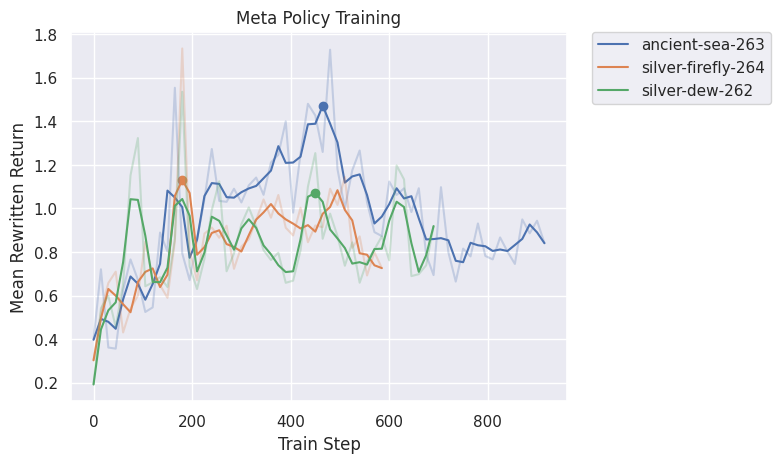

In [6]:
fig, ax = plt.subplots()
for run in runs:
    wanbd_run = run['run']
    df = run['history']
    df = df[df['EvalRewrittenAverageReturn'].isna() == False]
    y = df['EvalRewrittenAverageReturn'].array
    y_smooth = np.concatenate([[y[0]], np.convolve(y, np.ones(3)/3, mode='valid'), [y[-1]]])

    x = df['TrainStep'].array
    xs = list(x)
    best_model_epoch = max(xs, key=lambda i: y_smooth[xs.index(i)])
    run['best_model_epoch'] = best_model_epoch

    line, *_ = ax.plot(x, y, alpha=0.25)
    ax.plot(df['TrainStep'], y_smooth, label=wanbd_run.name, color=line.get_color())
    ax.scatter(best_model_epoch, y_smooth[xs.index(best_model_epoch)], color=line.get_color())

# legend outside plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel('Train Step')
ax.set_ylabel('Mean Rewritten Return')
ax.set_title('Meta Policy Training')
plt.show()

In [7]:
from mlrl.meta.meta_policies.search_ppo_agent import create_search_ppo_agent

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [9]:
agent, actor_net, value_net = create_search_ppo_agent(batched_meta_env, run_args, return_networks=True)

In [13]:
agent2, actor_net1, value_net2 = create_search_ppo_agent(batched_meta_env, run_args, return_networks=True)

In [15]:
time_step = batched_meta_env.reset()

In [19]:
agent.policy.distribution(time_step).action.logits, agent2.policy.distribution(time_step).action.logits

(<tf.Tensor: shape=(1, 65), dtype=float32, numpy=
 array([[ 3.7706566e-01,  2.5432914e-01, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
         -3.4028235e+38, -3.4028235e+38, -3.4028235e+38, -3.4028235e+38,
 

In [14]:
actor_net.save_weights('tmp/actor_net')
value_net.save_weights('tmp/value_net')

In [22]:
actor_net1.load_weights('outputs/runs/ppo_run_29-19-06-02-05-2023/network_checkpoints/step_1/actor_network')
value_net2.load_weights('outputs/runs/ppo_run_29-19-06-02-05-2023/network_checkpoints/step_1/value_network')

In [21]:
agent.policy.distribution(time_step).action.logits == agent2.policy.distribution(time_step).action.logits

<tf.Tensor: shape=(1, 65), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])>

In [ ]:
actor_model = tf.keras.Sequential([actor_net])
actor_model(batched_meta_env.reset().observation)

(<tfp.distributions.Categorical 'Categorical' batch_shape=[1] event_shape=[] dtype=int64>,
 ())

In [8]:
import tf_agents
import tensorflow as tf


def load_policy(env, args, ckpt_dir: str = None):

    agent = create_search_ppo_agent(env, args)
    policy = agent.policy

    checkpoint = tf.train.Checkpoint(policy=policy)

    if ckpt_dir:
        file_prefix = os.path.join(ckpt_dir,
                                   tf.saved_model.VARIABLES_DIRECTORY,
                                   tf.saved_model.VARIABLES_FILENAME)

        print(f'Loading checkpoint from {file_prefix}')
        checkpoint.read(file_prefix)

    return policy


for run in runs:
    best_epoch = run['best_model_epoch']

    saved_model_path = run['model_dir'] / 'policies/ckpt/policy'
    ckpt_dir = run['model_dir'] / f'policies/ckpt/checkpoints/policy_checkpoint_{best_epoch:010d}'
    # ckpt_dir = run['model_dir'] / f'policies/best/greedy_policy'

    from mlrl.experiments.procgen_meta import create_batched_procgen_meta_envs, load_pretrained_q_network

    exclude_keys = ['learning_rate', 'name']
    run_args = {
        k: v for k, v in run['config'].items()
        if k not in exclude_keys
    }

    run['run_args'] = run_args

    object_config = load_pretrained_q_network(
        folder=run_args['pretrained_runs_folder'],
        run=run_args['pretrained_run'],
        percentile=run_args.get('pretrained_percentile', 0.75),
        verbose=False
    )

    batched_meta_env = create_batched_procgen_meta_envs(
        1, run_args['object_level_config'], **run_args
    )

    # from tf_agents.policies.policy_loader import load
    # run['best_policy'] = load(saved_model_path, ckpt_dir)
    run['best_policy'] = load_policy(batched_meta_env, run_args, ckpt_dir)
    # run['best_policy'] = tf.compat.v2.saved_model.load(str(saved_model_path))

    # from tf_agents.policies import py_tf_eager_policy
    # run['best_policy'] = py_tf_eager_policy.SavedModelPyTFEagerPolicy(
    #         saved_model_path, batched_meta_env.time_step_spec(), batched_meta_env.action_spec())

pygame 2.1.3 (SDL 2.0.22, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using TensorFlow 2.12.0


2023-05-02 05:33:27.646954: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Loading checkpoint from outputs/runs/ppo_run_51-48-04-01-05-2023/policies/ckpt/checkpoints/policy_checkpoint_0000000465/variables/variables


Loading checkpoint from outputs/runs/ppo_run_01-51-04-01-05-2023/policies/ckpt/checkpoints/policy_checkpoint_0000000180/variables/variables


Loading checkpoint from outputs/runs/ppo_run_39-44-04-01-05-2023/policies/ckpt/checkpoints/policy_checkpoint_0000000450/variables/variables


In [36]:
# for run in runs:

#     run_args = run['run_args']

#     load_pretrained_q_network(
#         folder=run_args['pretrained_runs_folder'],
#         run=run_args['pretrained_run'],
#         percentile=run_args.get('pretrained_percentile', 0.75),
#     )

#     eval_runner = EvalRunner(eval_env=run['env'],
#                              policy=run['best_policy'],
#                              eval_steps=1024 * 8,
#                              rewrite_rewards=True,
#                              convert_to_eager=False)

#     run['eval_metrics'] = eval_runner.run()

<Axes: >

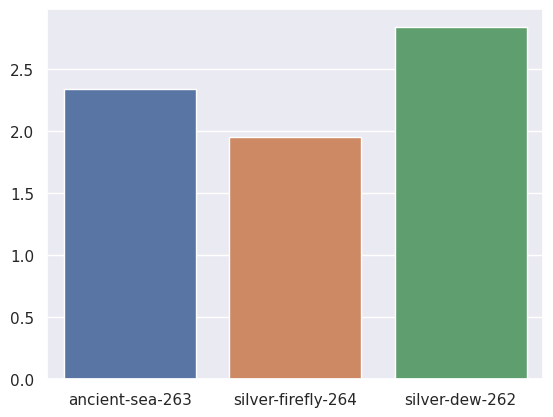

In [127]:
sns.barplot(x=[run['run'].name for run in runs],
            y=[run['eval_metrics']['EvalRewrittenAverageReturn'] for run in runs])

<Axes: >

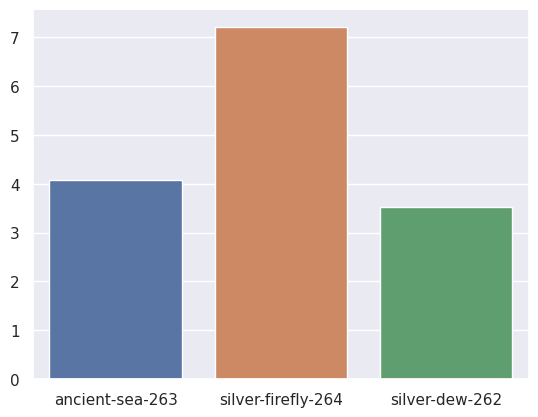

In [138]:
sns.barplot(x=[run['run'].name for run in runs],
            y=[run['eval_metrics']['EvalAverageEpisodeLength'] for run in runs])

In [98]:
run = runs[0]
run_args = run['run_args']


object_config = load_pretrained_q_network(
    folder=run_args['pretrained_runs_folder'],
    run=run_args['pretrained_run'],
    percentile=run_args.get('pretrained_percentile', 0.75),
    verbose=False
)

from mlrl.runners.eval_runner import EvalRunner


batched_meta_env = create_batched_procgen_meta_envs(
    n_envs=2,
    object_config=object_config,
    **run_args
)

eval_runner = EvalRunner(eval_env=batched_meta_env,
                         policy=run['best_policy'],
                         eval_steps=1024 * 8,
                         convert_to_eager=False,
                         rewrite_rewards=True)


In [99]:
from mlrl.utils.render_utils import embed_mp4

embed_mp4(eval_runner.create_policy_eval_video(10))

In [12]:
from mlrl.experiments.procgen_baseline_meta import test_policies_with_pretrained_model, ResultsAccumulator
from mlrl.utils import time_id

Writing results to tmp/outputs/eval/procgen/18-19-01-02-05-2023
Evaluating Learned Meta-Policy Trained at Percentile 0.5
2/2 [==============================] - 118s 110ms/episode - ObjectLevelMeanReward: 21.0000 - ObjectLevelMeanStepsPerEpisode: 101.0000 - ObjectLevelEpisodes: 2.0000
Evaluation stats:
EvalTime: 117.646


[{'Meta-level Policy': 'Learned Meta-Policy Trained at Percentile 0.5',
  'wandb_version': 1,
  '_wandb': {'cli_version': '0.12.10',
   'framework': 'keras',
   'is_jupyter_run': False,
   'is_kaggle_kernel': False,
   'python_version': '3.8.10',
   'start_time': 1682916582,
   't': {1: [2, 3], 3: [16], 4: '3.8.10', 5: '0.12.10', 8: [5]}},
  'agent': 'ppo',
  'collect_steps': 4096,
  'computational_rewards': True,
  'env_batch_size': 64,
  'eval_interval': 15,
  'eval_steps': 1000,
  'expand_all_actions': True,
  'finish_on_terminate': True,
  'gpus': None,
  'max_cost_of_computation': 0.002,
  'max_tree_size': 64,
  'meta_discount': 0.99,
  'meta_time_limit': 500,
  'min_train_computation_steps': 5,
  'n_collect_envs': 64,
  'n_eval_envs': 64,
  'n_lstm_layers': 0,
  'n_video_envs': 12,
  'num_iterations': 2000,
  'num_learn_samples': 10,
  'object_discount': 0.99,
  'object_level_config': {'action_repeats': 4,
   'agent_name': 'categorical_dqn_agent',
   'collect_steps_per_iteration'

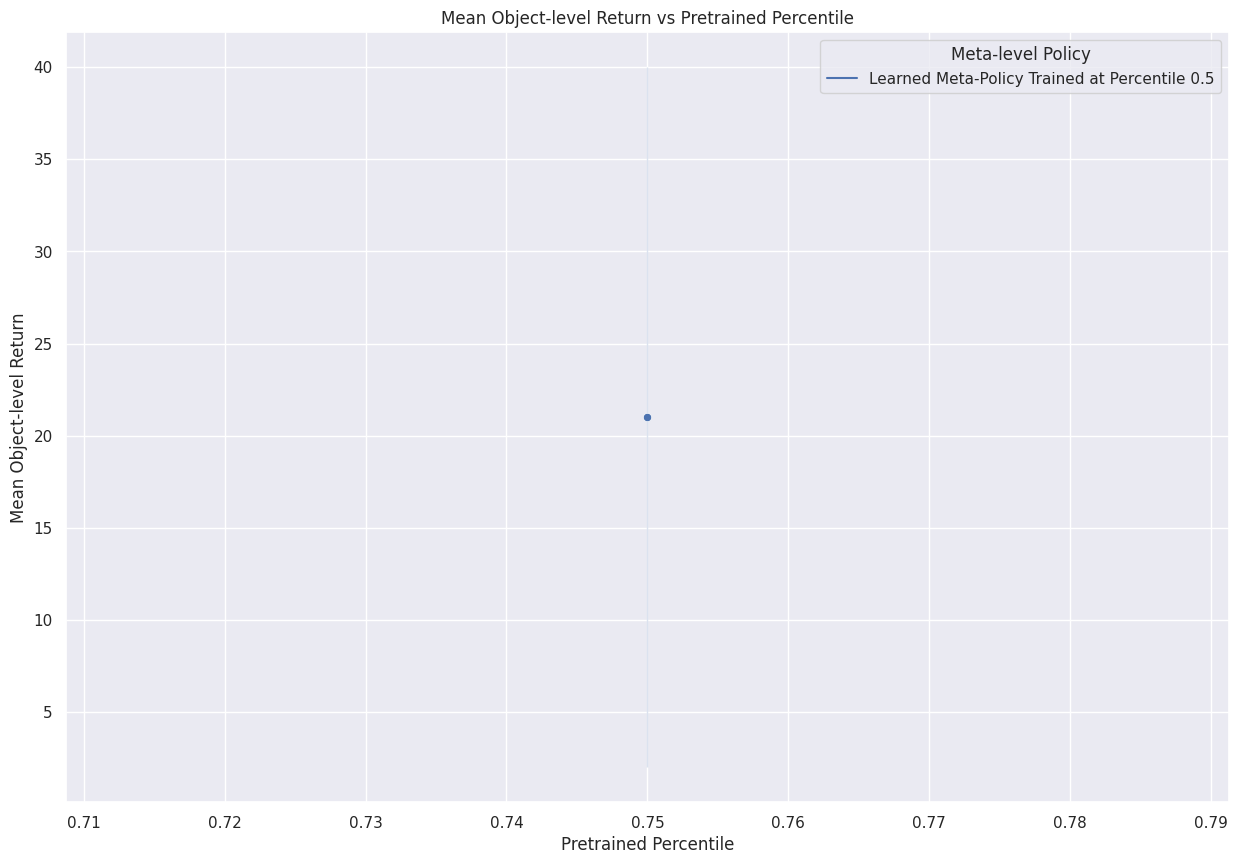

In [133]:
run = runs[0]

percentile = run['config']['pretrained_percentile']
policy_creators = {
    f'Learned Meta-Policy Trained at Percentile {percentile}': lambda _: run['best_policy']
}
output_dir = Path('tmp/outputs/eval/procgen') / time_id()
print(f'Writing results to {output_dir}')

results_accumulator = ResultsAccumulator(output_dir=output_dir)
exclude_keys = ['learning_rate', 'name']
run_args = {
    k: v for k, v in run['config'].items()
    if k not in exclude_keys
}

test_policies_with_pretrained_model(policy_creators,
                                    percentile=percentile,
                                    args=run_args,
                                    outputs_dir=output_dir,
                                    results_observer=results_accumulator,
                                    max_object_level_steps=500,
                                    n_object_level_episodes=2)